In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
# percentage calculation for DEATH_EVENT

no = (203 / (203+96)) * 100 
yes = (96 / (203+96)) * 100

In [7]:
no

67.89297658862876

In [8]:
yes

32.10702341137124

# Data visualization

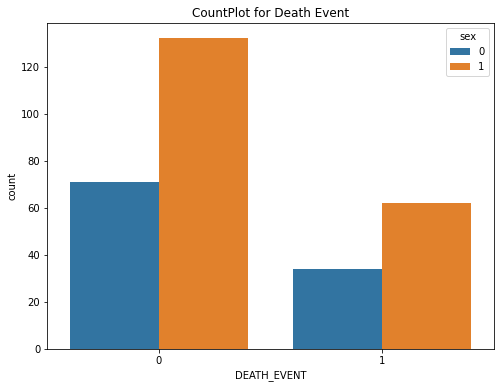

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='DEATH_EVENT',data=df,hue='sex')
plt.title("CountPlot for Death Event")
plt.show()

# Training- Test split for ML model

In [10]:
x = df.drop('DEATH_EVENT',axis=1)
y = df.DEATH_EVENT

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= 78)

In [13]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
276,70.0,0,618,0,35,0,327000.00,1.10,142,0,0,245
270,44.0,0,582,1,30,1,263358.03,1.60,130,1,1,244
16,87.0,1,149,0,38,0,262000.00,0.90,140,1,0,14
218,68.0,1,1021,1,35,0,271000.00,1.10,134,1,0,197
274,60.0,1,257,1,30,0,150000.00,1.00,137,1,1,245
...,...,...,...,...,...,...,...,...,...,...,...,...
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26
184,58.0,1,145,0,25,0,219000.00,1.20,137,1,1,170
105,72.0,1,328,0,30,1,621000.00,1.70,138,0,1,88
40,70.0,0,582,0,20,1,263358.03,1.83,134,1,1,31


In [14]:
y_train

276    0
270    0
16     1
218    0
274    0
      ..
29     1
184    1
105    1
40     1
197    0
Name: DEATH_EVENT, Length: 209, dtype: int64

# Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
clf.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
clf.score(x_test,y_test)

0.7555555555555555

# Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf1 = RandomForestClassifier()

In [22]:
clf1.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
clf1.score(x_test,y_test)

0.8666666666666667

# Hyper Parameter Tuning: GridSearchCV

In [24]:
trees = np.random.randint(15,200,25)

In [25]:
trees

array([147, 196, 149, 165, 165, 196,  71, 107, 125, 160,  40, 192,  88,
       188,  59, 190, 184, 132,  71, 198, 186, 104, 163,  16,  95])

In [26]:
criterion = ['gini','entropy']
max_depth = np.random.randint(1,15,20)
min_samples_split = [2,3,4]
max_features = ['sqrt','log2']

In [27]:
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
gcv = GridSearchCV(clf1,ids)

In [30]:
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  7, 14,  9, 13,  7,  1, 10,  7, 13,  6,  5, 14,  5, 12, 14,  9,
       13,  3,  8]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([147, 196, 149, 165, 165, 196,  71, 107, 125, 160,  40, 192,  88,
       188,  59, 190, 184, 132,  71, 198, 186, 104, 163,  16,  95])})

In [31]:
gcv.cv_results_

{'mean_fit_time': array([0.10578642, 0.13233528, 0.10044222, ..., 0.11824102, 0.01269536,
        0.06798739]),
 'std_fit_time': array([0.01236808, 0.00090611, 0.00021273, ..., 0.00203532, 0.00027463,
        0.00028094]),
 'mean_score_time': array([0.00693026, 0.00890136, 0.00691538, ..., 0.00787039, 0.0016048 ,
        0.00484376]),
 'std_score_time': array([9.47719820e-05, 1.34309462e-04, 1.93665168e-05, ...,
        1.19693763e-04, 6.71831236e-05, 9.36095104e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[6, 6, 6, ..., 8, 8, 8],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
     

In [32]:
result = pd.DataFrame(gcv.cv_results_)

In [33]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.105786,0.012368,0.006930,0.000095,gini,6,sqrt,2,147,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.833333,0.785714,0.761905,0.857143,0.780488,0.803717,0.035619,3506
1,0.132335,0.000906,0.008901,0.000134,gini,6,sqrt,2,196,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.857143,0.785714,0.785714,0.857143,0.780488,0.813240,0.035897,1810
2,0.100442,0.000213,0.006915,0.000019,gini,6,sqrt,2,149,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.880952,0.761905,0.738095,0.833333,0.804878,0.803833,0.050790,3104
3,0.110894,0.000251,0.007551,0.000026,gini,6,sqrt,2,165,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.857143,0.809524,0.785714,0.857143,0.829268,0.827758,0.027674,97
4,0.110967,0.000135,0.007568,0.000021,gini,6,sqrt,2,165,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.857143,0.785714,0.809524,0.809524,0.804878,0.813357,0.023591,1349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.131174,0.000186,0.008541,0.000031,entropy,8,log2,4,186,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.857143,0.785714,0.714286,0.880952,0.780488,0.803717,0.059466,3506
5996,0.075716,0.002628,0.005359,0.000220,entropy,8,log2,4,104,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.857143,0.785714,0.785714,0.880952,0.780488,0.818002,0.042396,1056
5997,0.118241,0.002035,0.007870,0.000120,entropy,8,log2,4,163,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.857143,0.785714,0.714286,0.880952,0.780488,0.803717,0.059466,3506
5998,0.012695,0.000275,0.001605,0.000067,entropy,8,log2,4,16,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.857143,0.761905,0.690476,0.880952,0.731707,0.784437,0.073100,5519


In [34]:
gcv.best_score_

0.8468060394889664

In [35]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 165}

In [36]:
clf2 = RandomForestClassifier(
    criterion = 'entropy', 
    max_depth = 5,
    max_features = 'log2',
    min_samples_split = 4,
    n_estimators = 165
)

In [37]:
clf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4, n_estimators=165)

In [38]:
clf2.score(x_test,y_test) 

0.9111111111111111

In [39]:
# Another Way 

clf3 = gcv.best_estimator_

In [40]:
clf3

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4, n_estimators=165)

In [41]:
clf3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4, n_estimators=165)

In [42]:
clf3.score(x_test,y_test)

0.9